# <img src="Datasets\HEADER.png">




<font color='red'>***Importer les bibliothèques*** *****numpy***** et *****pandas***** ***et importer functools de reduce***</font>

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np 
from functools import reduce 

# PARTIE I

Explorer la dataset `BL-Flickr-Images-Book.csv` 

<font color='red'>**NB:** faites attentions au chemin</font>

## 1 Exploration du dataset

In [ ]:
# Exporter BL-Flickr-Images-Book.csv dans un data frame nomé df
df = pd.read_csv('Datasets/BL-Flickr-Images-Book.csv')
# afficher les 5 premières lignes
df.head()

##  2. Jeter un coup d'oeil dans le dataset

In [ ]:
df.info()

##  3. Qu'est ce que vous remarquez?

>On remarque que les deux coloumns **Non-Null** et **Count** sont inversé. De plus, les rows n'ont pas le meme types **(object et float)**

## 4. Dropping unnecessary columns

Nous allons restreindre l'étude à seulement 7 colonnes pour cela nous allons supprimer 7 colonnes que nous jugeons unitiles por le moment :
```Python
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']``

In [ ]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1)
df.head()

In [1]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1)
df.head()


NameError: name 'df' is not defined

## 5. Setting the index of the dataset

Changer l'index pourqu'ille prenne la valeur de l'identifiant Identifier

In [ ]:
###Changerl'index 
df.set_index('Identifier', inplace=True)

###Afficher le résultat
df.head()

 ## 6. Donner un appérçu sur la colonne `Date of Publication` 


In [ ]:
### Afficher  les 25 premières valeurs de Date of Publication
dop=df['Date of Publication']
dop.head()

> Remarque : Observer la date de publication qui correspond à l'index 206.
> Ca nécessite un nettoyage et une correction : il faut éliminer certains symboles 

 ## 7. Cleaning columns using the `.apply` function

Ecrire une fonction qui permet de nettoyer la colonne des dates

In [ ]:
unwanted_characters = ['[', ',', '-']
# Completer la fonction suivante
def clean_dates(item):
    dop= str(item.loc['Date of Publication'])
    
    if dop == 'nan' or dop[0] == '[':
        pass
    
    for character in unwanted_characters:
        if character in dop:
            pass
            pass
    
    return dop

df['Date of Publication'] = df.apply(clean_dates, axis = 1)

In [ ]:
df.head()

In [ ]:
#Voici une autre méthode
#exécuter pour voir le résultat
unwanted_characters = ['[', ',', '-']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'NaN'
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop

df['Date of Publication'] = df['Date of Publication'].apply(clean_dates)
df.head(10)

## 8. Observer la colonne `Author`

## Completer la fonction `clean_author_names`qui permet de corriger les valeurs de cet colonne

In [ ]:
def clean_author_names(author):
    
    author = str(author)
    
    if author == 'nan':
        return 'NaN'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

In [ ]:
df.head()

##  Observer la colonne `title`
## 9. Completer la fonction `clean_title`qui permet de corriger les valeurs de cet colonne

In [ ]:
# complétrer la fonction suivante ( à la place de pass)

def clean_title(title):
    
    if title == 'nan':
        return 'NaN'
    
    if title[0] == '[':
        title=title.replace('[','')
        
    if 'by' in title:
        parts=title.split('by')
        title=parts[0]
    elif 'By' in title:
        parts=title.split('By')
        title=parts[0]
        
        
    if '[' in title:
        parts=title.split('[')
        title=parts[0]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df['Title'].apply(clean_title)

# PARTIE II

## 1 Cleaning entire dataset
## On considère le fichier suivant 'university_towns.txt'

In [ ]:
!head Datasets/university_towns.txt

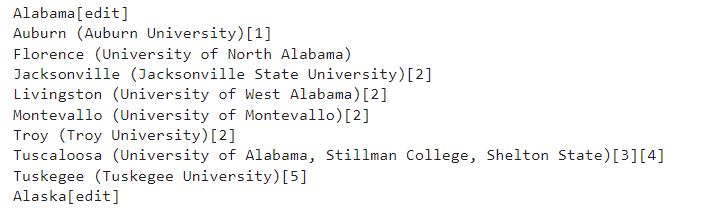

In [ ]:
with open('Datasets/university_towns.txt', 'r') as text:
    textfile = text.read()
    print(textfile)

##  2. Créer un pandas data frame à partir d'un fichier txt

>On veut créer un DataFrame nommé `towns_df` à partir du fichier 'university_towns.txt'

>Nous voyons que nous avons des noms d'états périodiques suivis des villes universitaires de cet état: StateA TownA1 TownA2 StateB TownB1 TownB2 .... Si nous regardons la façon dont les noms d'états sont écrits dans le fichier, nous verrons qu'ils ont tous la sous-chaîne «[edit]» en eux.

>Nous pouvons tirer parti de ce modèle en créant une liste de tuples (état, ville) et en enveloppant cette liste dans un DataFrame:

In [ ]:
university_towns = []

with open('Datasets/university_towns.txt', 'r') as file:
    items = file.readlines()
    states = list(filter(lambda x: '[edit]' in x, items))
    
    for index, state in enumerate(states):
        start = items.index(state) + 1
        if index == 49: #since 50 states
            end = len(items)
        else:
            end = items.index(states[index + 1])
            
        pairs = map(lambda x: [state, x], items[start:end])
        university_towns.extend(pairs)
        
towns_df = pd.DataFrame(university_towns, columns = ['State', 'RegionName'])
towns_df.head()

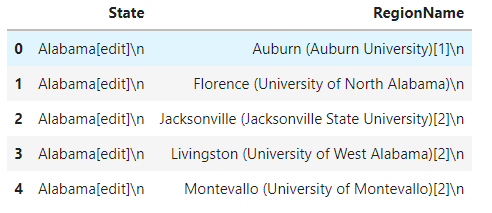

In [ ]:
towns_df = pd.DataFrame(university_towns,
                        columns=['State', 'RegionName'])
towns_df.head()

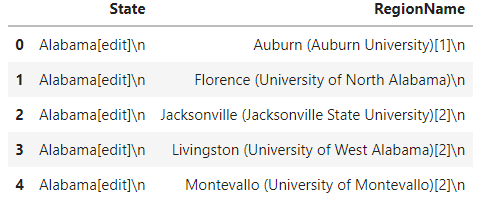

## 3. Compléter la fonction `clean_up` pour nettoyer les colonnes de `towns_df`

In [ ]:
def clean_up(item):
    if '(' in item:
        return item[:item.find('(') - 1]
    
    if '[' in item:
        return item[:item.find('[')]
    

towns_df =  towns_df.applymap(clean_up)
towns_df.head()

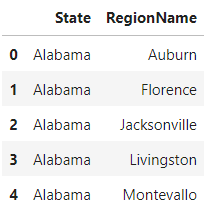

# PART III

## 1. Renaming columns and skipping rows
### 1.1 Convertir le fichier `olympics.csv` en dataframe pandas `olympics_df`

In [ ]:
# exporter 'olympics.csv' sous forme de data frame nommé olympics_df
olympics_df = pd.read_csv('Datasets/olympics.csv')

# Afficher les 5 premières lignes
olympics_df.head()

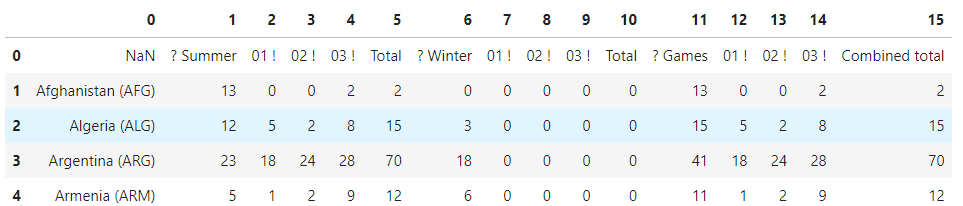

## 1.2 Supprimer la première ligne

In [ ]:
# exporter 'olympics.csv' sous forme de data frame nommé olympics_df en supprimant la première ligne

olympics_df = pd.read_csv('./Datasets/olympics.csv', skiprows = 1, header = 0)

# Afficher les 5 premières lignes
olympics_df.head()

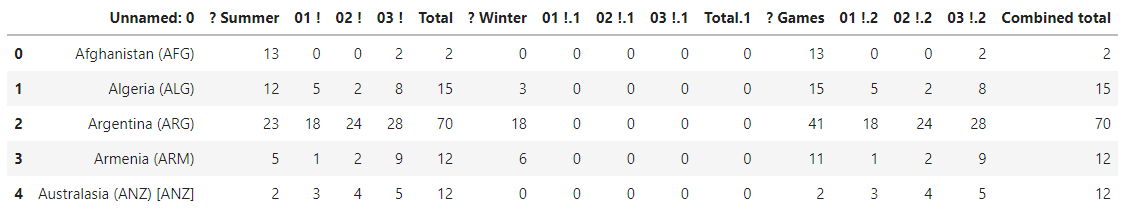

# 1.3 Changer le nom des colonnes en utilisant le dictionnaire suivant :

```python
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games', 
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}


```

In [ ]:
# Changer le nom des colonnes en utilisant le dictionnaire new_names
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games', 
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}

olympics_df.rename(columns = new_names, inplace = True)

# Afficher les 5 premières lignes
olympics_df.head()

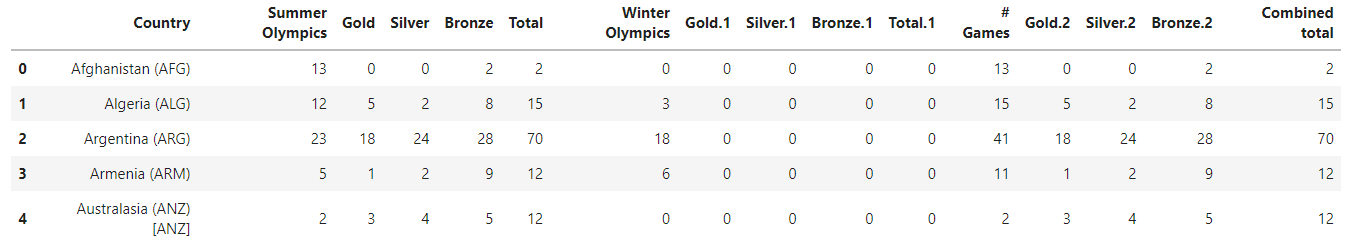